<a href="https://colab.research.google.com/github/gabilodeau/INF6804/blob/master/ObjectProposals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INF6804 Vision par ordinateur

Polytechnique Montréal

Exemple de propositions d'objets avec la méthode selective search.

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

Lecture d'une image.

In [2]:
image_name = 'in001562.jpg'
if not os.path.exists(image_name):
  !gdown https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in001562.jpg

Downloading...
From: https://raw.githubusercontent.com/gabilodeau/INF6804/master/images/in001562.jpg
To: /content/in001562.jpg
100% 65.8k/65.8k [00:00<00:00, 4.48MB/s]


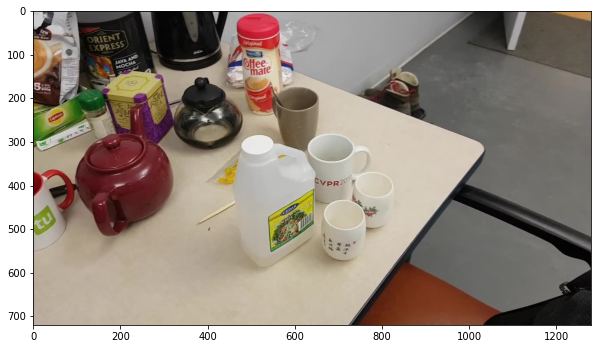

In [3]:
image = cv2.imread(image_name)
plt.figure(figsize = (10,10))
image = image[:,:,::-1] #OpenCV lit les images en BGR
plt.imshow(image)
plt.show()

Initialisation et application de Selective search. 

In [4]:
ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)
ss.switchToSelectiveSearchQuality()
rects = ss.process() #Obtient des rectangles englobants
print('Nombre total de propositions d\'objets: {}'.format(len(rects)))

Nombre total de propositions d'objets: 15577


Affichage du résultat.

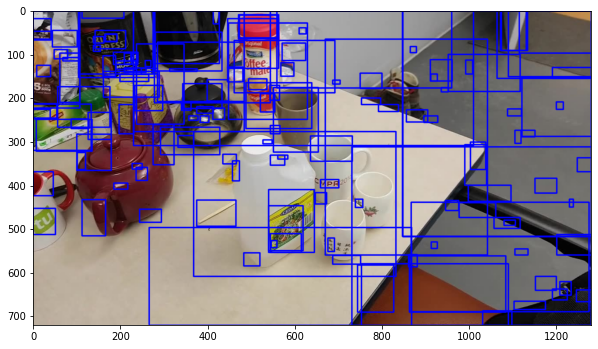

In [5]:
Nombreprops = 150
imSortie = np.copy(image)
for i, rect in enumerate(rects):
    # draw rectangle for region proposal till numShowRects
    if (i < Nombreprops):
        x, y, w, h = rect
        cv2.rectangle(imSortie, (x, y), (x + w, y + h), (0, 0, 255), 2, cv2.LINE_AA)
    else:
        break
        
plt.figure(figsize = (10,10))
plt.imshow(imSortie)
plt.show()